# Chapter 1: Solving Equations

## Bisection
Problem 3: Use the Bisection Method to locate all solutions of the following equations. Sketch the function by using Matlab’s plot command and identify three intervals of length one that contain a root. Then find the roots to six correct decimal places.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from commons.bisection import *

# Define function
def f_a(x):
    return 2 * np.power(x, 3) - (6 * x) - 1
def f_b(x):
    return np.exp(x - 2) + np.power(x, 3) - x
def f_c(x):
    return 1 + (5 * x) - (6 * np.power(x, 3)) - np.exp(2 * x)

# Set tolerance
tol = .5e-6

a) The root approximation for $2x^3 - 6x -1 = 0$ is 

In [2]:
print("First interval:", bisect(f_a, -2, -0.5, tol))
print("Second interval:", bisect(f_a, -1, 1, tol))
print("Third interval:", bisect(f_a, 1, 2, tol))

First interval: -1.6417838335037231
Second interval: -0.16825437545776367
Third interval: 1.8100380897521973


b) The root approximation for $e^{x-2} + x^3 - x = 0$

In [3]:
# Print out the approximate roots for 1.1.3 (b)
print("First interval:", bisect(f_b, -2, -0.5, tol))
print("Second interval:", bisect(f_b, -0.5, 0.5, tol))
print("Third interval:", bisect(f_b, 0.5, 1, tol))

First interval: -1.0234824419021606
Second interval: 0.16382265090942383
Third interval: 0.7889418601989746


c) The root approximation for $1 + 5x - 6x^3 - e^{2x} = 0$

In [4]:
# Print out the approximate roots for 1.1.4 (c)
print("First interval:", bisect(f_c, -1, -0.5, tol))
print("Second interval:", bisect(f_c, -0.5, 0.4, tol))
print("Third interval:", bisect(f_c, 0.4, 0.6, tol))

First interval: -0.8180937767028809
Second interval: 2.384185791138983e-07
Third interval: 0.5063083648681642


In [5]:
# set x-axis
x = np.arange(-2, 2, 0.001)

# set subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, figsize=(20,10))

# plot the function in 1.1.3 (a), set y-lim, add legend, change the tick size, and add grid
ax1.plot(x, f_a(x), label='1.1.3 (a)')
ax1.set_ylim([-5, 5])
ax1.legend(loc='upper left', fontsize='small')
ax1.tick_params(labelsize=8)
ax1.grid(True)

# plot the function in 1.1.3 (b), set y-lim, add legend, change the tick size, and add grid
ax2.plot(x, f_b(x), label='1.1.3 (b)')
ax2.set_ylim([-3, 3])
ax2.legend(loc='upper left', fontsize='small')
ax2.tick_params(labelsize=8)
ax2.grid(True)

# plot the function in 1.1.3 (c), set y-lim, add legend, change the tick size, and add grid
ax3.plot(x, f_c(x), label='1.1.3 (c)')
ax3.set_ylim([-3, 3])
ax3.legend(loc='upper left', fontsize='small')
ax3.tick_params(labelsize=8)
ax3.grid(True)

plt.show()

## Kinematics of The Steward Problem

In [6]:
# Define variables
L1 = 2
L2 = np.sqrt(2)
L3 = L2
gamma = np.pi / 2
p1 = np.sqrt(5)
p2 = p1
p3 = p2
x1 = 4
x2 = 0
y2 = 4

# Define all necessary functions
def a_2(theta):
    return L3 * np.cos(theta) - x1

def b_2(theta):
    return L3 * np.sin(theta)

def a_3(theta):
    return L2 * (np.cos(theta) * np.cos(gamma) - np.sin(theta) * np.sin(gamma)) - x2

def b_3(theta):
    return L2 * (np.cos(theta) * np.sin(gamma) + np.sin(theta) * np.cos(gamma)) - y2

def n1(theta):
    return (b_3(theta) * (np.power(p2, 2) - np.power(p1, 2) - np.power(a_2(theta), 2) - np.power(b_2(theta), 2))
            - b_2(theta) * (np.power(p3, 2) - np.power(p1, 2) - np.power(a_3(theta), 2) - np.power(b_3(theta), 2)))

def n2(theta):
    return (-a_3(theta) * (np.power(p2, 2) - np.power(p1, 2) - np.power(a_2(theta), 2) - np.power(b_2(theta), 2))
            + a_2(theta) * (np.power(p3, 2) - np.power(p1, 2) - np.power(a_3(theta), 2) - np.power(b_3(theta), 2)))

def d(theta):
    return 2 * (a_2(theta) * b_3(theta) - b_2(theta) * a_3(theta))

def forwKinematics(theta):
    return np.power(n1(theta), 2) + np.power(n2(theta), 2) - np.power(p1, 2) * np.power(d(theta), 2)

1) The parameters $L_1, L_2, L_3, \gamma, x_1, x_2, y_2$ are fixed constants, and the strut lengths $p_1, p_2, p_3$ will be known for a given pose. Set the parameter $L_1 = 2, L_2 = L_3 = \sqrt{2}, \gamma = \frac{\pi}{2}, p_1 = p_2 = p_3 = \sqrt{5}$

Then substituting $\theta = \frac{-\pi}{4}$ or $\theta = \frac{\pi}{4}$. This should make $f(\theta) = 0$

In [7]:
print ("for theta = -pi/4, forwKinematics return", forwKinematics(-np.pi / 4))
print ("for theta =  pi/4, forwKinematics return", forwKinematics(np.pi / 4))

for theta = -pi/4, forwKinematics return -4.547473508864641e-13
for theta =  pi/4, forwKinematics return -4.547473508864641e-13


2) Plot $f(\theta)$ on $[-\pi, \pi]$. There should be roots at $\pm \frac{\pi}{4}$

In [8]:
x = np.arange(-np.pi, np.pi, 0.00001)

plt.plot(x, forwKinematics(x))
plt.grid()
plt.show()

# Set tolerance
tol = .5e-6

# Verify that root at -pi/4 and pi/4, pi/4 is approximately 0.78539 from WolframAlpha
print ("Verify that the first root is at pi/4", bisect(forwKinematics, -1, 0, tol))
print ("Verify that the second root is at pi/4", bisect(forwKinematics, 0, 1, tol))

Verify that the first root is at pi/4 -0.785398006439209
Verify that the second root is at pi/4 0.785398006439209


3) Reproduce Figure 1.15 from the textbook

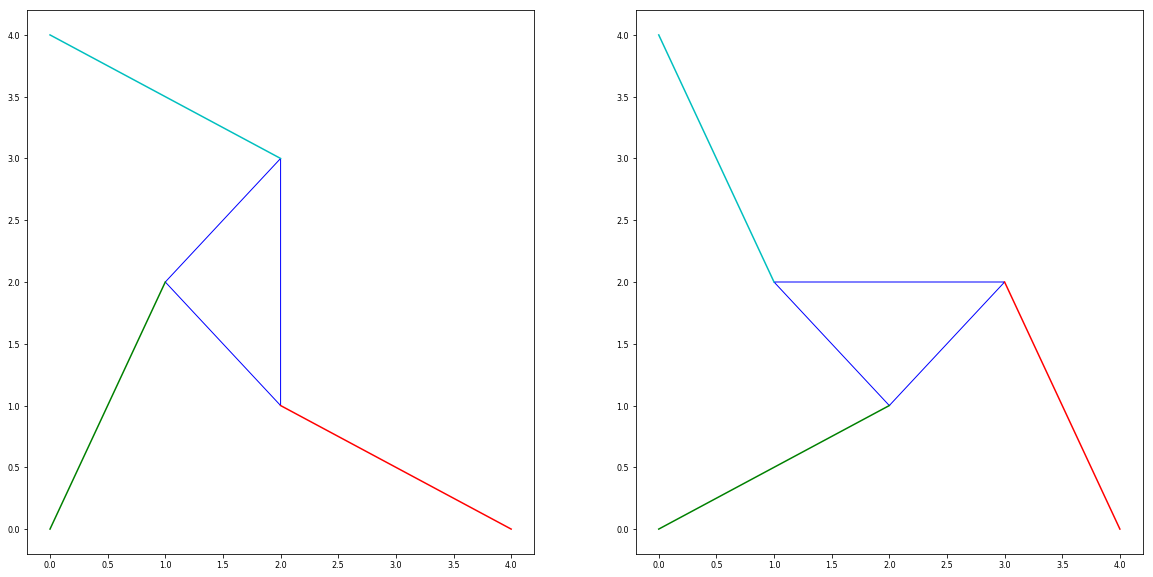

In [9]:
# Plot the left one
x1l, y1l = [0, 1], [0, 2]
x2l, y2l = [0, 2], [4, 3]
x3l, y3l = [2, 4], [1, 0]

pointsl = [[1, 2], [2, 1], [2, 3]]
trianglel = plt.Polygon(pointsl, fill=None, edgecolor='b')

fig, (fig_115l, fig_115r) = plt.subplots(1, 2, sharex=True, figsize=(20,10))

fig_115l.add_patch(trianglel)
fig_115l.plot(x1l, y1l, 'g', x2l, y2l, 'c', x3l, y3l, 'r')
fig_115l.tick_params(labelsize=8)

# Plot the right one
x1r, y1r = [0, 2], [0, 1]
x2r, y2r = [0, 1], [4, 2]
x3r, y3r = [3, 4], [2, 0]

pointsr = [[1, 2], [2, 1], [3, 2]]
triangler = plt.Polygon(pointsr, fill=None, edgecolor='b')

fig_115r.add_patch(triangler)
fig_115r.plot(x1r, y1r, 'g', x2r, y2r, 'c', x3r, y3r, 'r')
fig_115r.tick_params(labelsize=8)

plt.show()

4) Solve the forward kinematics problem for the planar Stewart platform specified by $x_1 = 5, (x_2, y_2) = (0,6), L_1 = L_3 = 3, L_2 = 3\sqrt{2}, \gamma = \frac{\pi}{4}, p_1 = p_2 = 5, p_3 = 3$

The first theta = -0.7208495140075684
The second theta = -0.3310055732727051
The third theta = 1.1436858177185059
The fourth theta = 2.1159090995788574


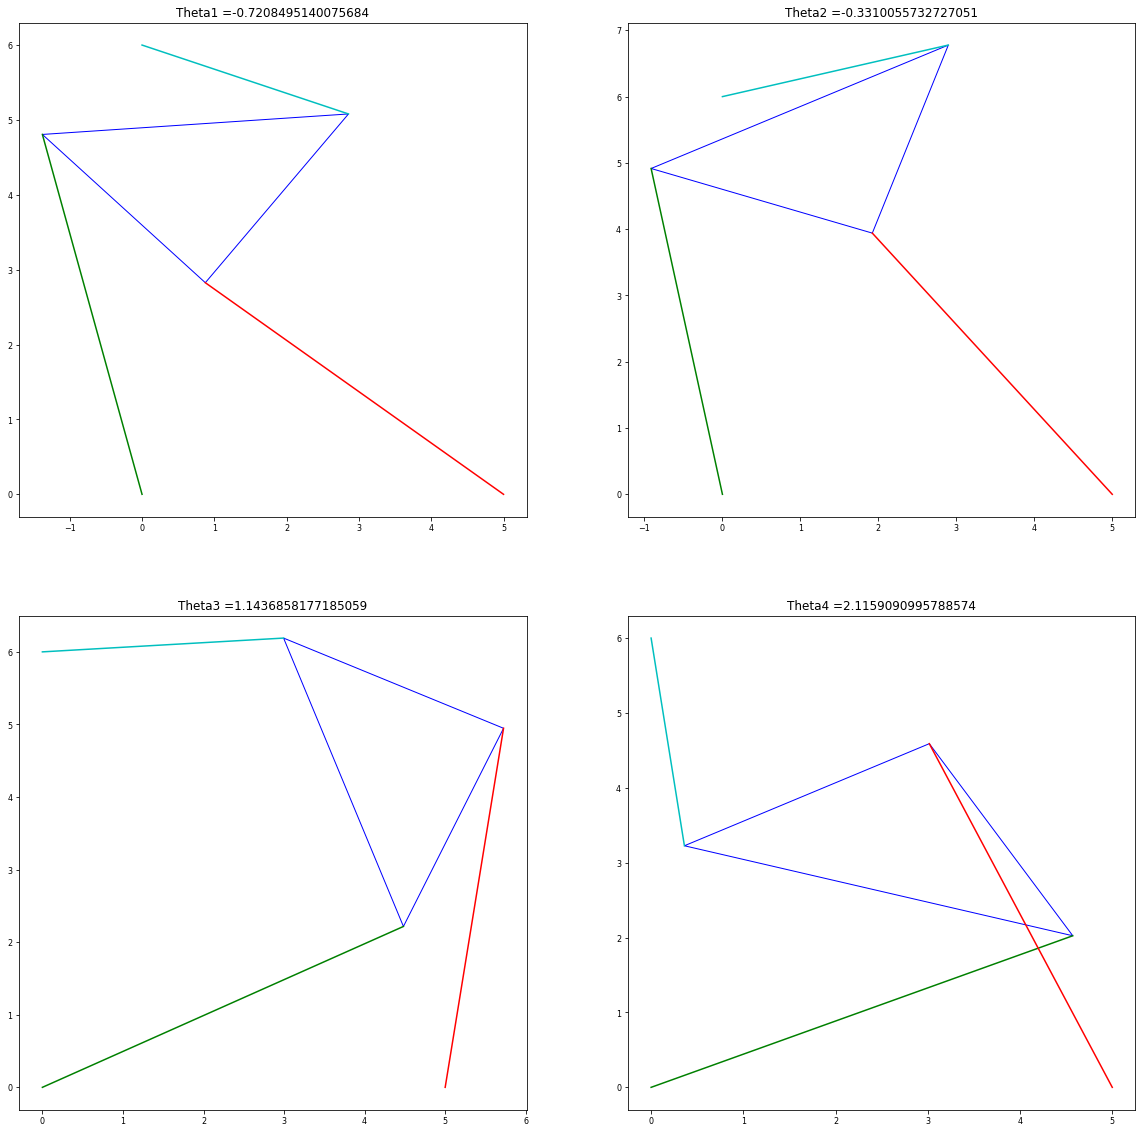

In [10]:
x1 = 5
x2 = 0
y2 = 6
L1 = 3
L3 = 3
L2 = 3 * np.sqrt(2)
gamma = np.pi / 4
p1 = 5
p2 = 5
p3 = 3

x = np.arange(-np.pi, np.pi, 0.00001)
plt.plot(x, forwKinematics(x))
plt.grid()
plt.show()

theta1 = bisect(forwKinematics, -1, -0.5, tol)
theta2 = bisect(forwKinematics, -0.5, 0, tol)
theta3 = bisect(forwKinematics, 1, 1.5, tol)
theta4 = bisect(forwKinematics, 2, 3, tol)

print ("The first theta =", theta1)
print ("The second theta =", theta2)
print ("The third theta =", theta3)
print ("The fourth theta =", theta4)

# Theta 1

# Solve for x and y
solvedxtheta1 = n1(theta1) / d(theta1)
solvedytheta1 = n2(theta1) / d(theta1)

# Solve for the end point of p3
endpointsp3x = solvedxtheta1 + a_3(theta1) + x2
endpointsp3y = solvedytheta1 + b_3(theta1) + y2

# Solve for the end point of p2
endpointsp2x = solvedxtheta1 + a_2(theta1) + x1
endpointsp2y = solvedytheta1 + b_2(theta1)

# Set 4 subplots
fig = plt.figure(figsize=(20,20))

# Plot for theta1
x1theta1, y1theta1 = [0, solvedxtheta1], [0, solvedytheta1]
x2theta1, y2theta1 = [x2, endpointsp3x], [y2, endpointsp3y]
x3theta1, y3theta1 = [x1, endpointsp2x], [0, endpointsp2y]

pointstheta1 = [[endpointsp3x, endpointsp3y], [endpointsp2x, endpointsp2y], [solvedxtheta1, solvedytheta1]]
triangletheta1 = plt.Polygon(pointstheta1, fill=None, edgecolor='b')

fig_theta1 = fig.add_subplot(221)
fig_theta1.add_patch(triangletheta1)
fig_theta1.plot(x1theta1, y1theta1, 'g', x2theta1, y2theta1, 'c', x3theta1, y3theta1, 'r')
fig_theta1.tick_params(labelsize=8)
fig_theta1.title.set_text('Theta1 =' + str(theta1))

# Theta 2

# Solve for x and y
solvedxtheta2 = n1(theta2) / d(theta2)
solvedytheta2 = n2(theta2) / d(theta2)

# Solve for the end point of p3
endpointsp3x = solvedxtheta2 + a_3(theta2) + x2
endpointsp3y = solvedytheta2 + b_3(theta2) + y2

# Solve for the end point of p2
endpointsp2x = solvedxtheta2 + a_2(theta2) + x1
endpointsp2y = solvedytheta2 + b_2(theta2)

# Plot theta2
x1theta2, y1theta2 = [0, solvedxtheta2], [0, solvedytheta2]
x2theta2, y2theta2 = [x2, endpointsp3x], [y2, endpointsp3y]
x3theta2, y3theta2 = [x1, endpointsp2x], [0, endpointsp2y]

pointstheta2 = [[endpointsp3x, endpointsp3y], [endpointsp2x, endpointsp2y], [solvedxtheta2, solvedytheta2]]
triangletheta2 = plt.Polygon(pointstheta2, fill=None, edgecolor='b')

fig_theta2 = fig.add_subplot(222)
fig_theta2.add_patch(triangletheta2)
fig_theta2.plot(x1theta2, y1theta2, 'g', x2theta2, y2theta2, 'c', x3theta2, y3theta2, 'r')
fig_theta2.tick_params(labelsize=8)
fig_theta2.title.set_text('Theta2 =' + str(theta2))

# Theta 3

# Solve for x and y
solvedxtheta3 = n1(theta3) / d(theta3)
solvedytheta3 = n2(theta3) / d(theta3)

# Solve for the end point of p3
endpointsp3x = solvedxtheta3 + a_3(theta3) + x2
endpointsp3y = solvedytheta3 + b_3(theta3) + y2

# Solve for the end point of p2
endpointsp2x = solvedxtheta3 + a_2(theta3) + x1
endpointsp2y = solvedytheta3 + b_2(theta3)

# Plot theta3
x1theta3, y1theta3 = [0, solvedxtheta3], [0, solvedytheta3]
x2theta3, y2theta3 = [x2, endpointsp3x], [y2, endpointsp3y]
x3theta3, y3theta3 = [x1, endpointsp2x], [0, endpointsp2y]

pointstheta3 = [[endpointsp3x, endpointsp3y], [endpointsp2x, endpointsp2y], [solvedxtheta3, solvedytheta3]]
triangletheta3 = plt.Polygon(pointstheta3, fill=None, edgecolor='b')

fig_theta3 = fig.add_subplot(223)
fig_theta3.add_patch(triangletheta3)
fig_theta3.plot(x1theta3, y1theta3, 'g', x2theta3, y2theta3, 'c', x3theta3, y3theta3, 'r')
fig_theta3.tick_params(labelsize=8)
fig_theta3.title.set_text('Theta3 =' + str(theta3))

# Theta 4

# Solve for x and y
solvedxtheta4 = n1(theta4) / d(theta4)
solvedytheta4 = n2(theta4) / d(theta4)

# Solve for the end point of p3
endpointsp3x = solvedxtheta3 + a_3(theta4) + x2
endpointsp3y = solvedytheta3 + b_3(theta4) + y2

# Solve for the end point of p2
endpointsp2x = solvedxtheta4 + a_2(theta4) + x1
endpointsp2y = solvedytheta4 + b_2(theta4)

# Plot theta4
x1theta4, y1theta4 = [0, solvedxtheta4], [0, solvedytheta4]
x2theta4, y2theta4 = [x2, endpointsp3x], [y2, endpointsp3y]
x3theta4, y3theta4 = [x1, endpointsp2x], [0, endpointsp2y]

pointstheta4 = [[endpointsp3x, endpointsp3y], [endpointsp2x, endpointsp2y], [solvedxtheta4, solvedytheta4]]
triangletheta4 = plt.Polygon(pointstheta4, fill=None, edgecolor='b')

fig_theta4 = fig.add_subplot(224)
fig_theta4.add_patch(triangletheta4)
fig_theta4.plot(x1theta4, y1theta4, 'g', x2theta4, y2theta4, 'c', x3theta4, y3theta4, 'r')
fig_theta4.tick_params(labelsize=8)
fig_theta4.title.set_text('Theta4 =' + str(theta4))

plt.show()